# <center>Image classification for Blind People

### Mathew Varghese

## Import TensorFlow and other libraries

In [763]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Download and explore the dataset

This tutorial uses a dataset of images of commonly seen items. The dataset contains 10 sub-directories, one per class


In [764]:
# Setting data path
import pathlib
data_dir = "C:\\Users\\Mathew Varghese\\.keras\\datasets\\blind"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Mathew Varghese/.keras/datasets/blind')

In [765]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print("number of images : ", image_count)

number of images :  2172


## Checking the images

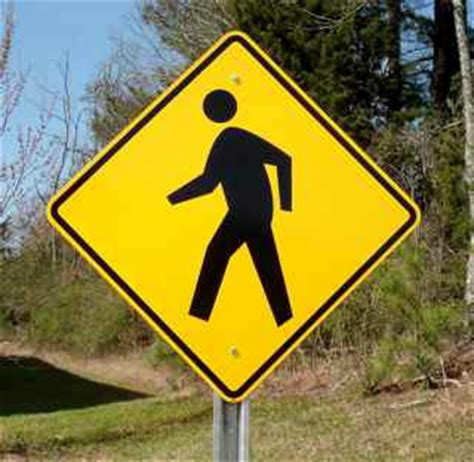

In [766]:
item = list(data_dir.glob('Crossing/*'))
PIL.Image.open(str(item[0]))

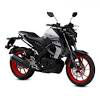

In [767]:
item = list(data_dir.glob('Bike/*'))
PIL.Image.open(str(item[0]))

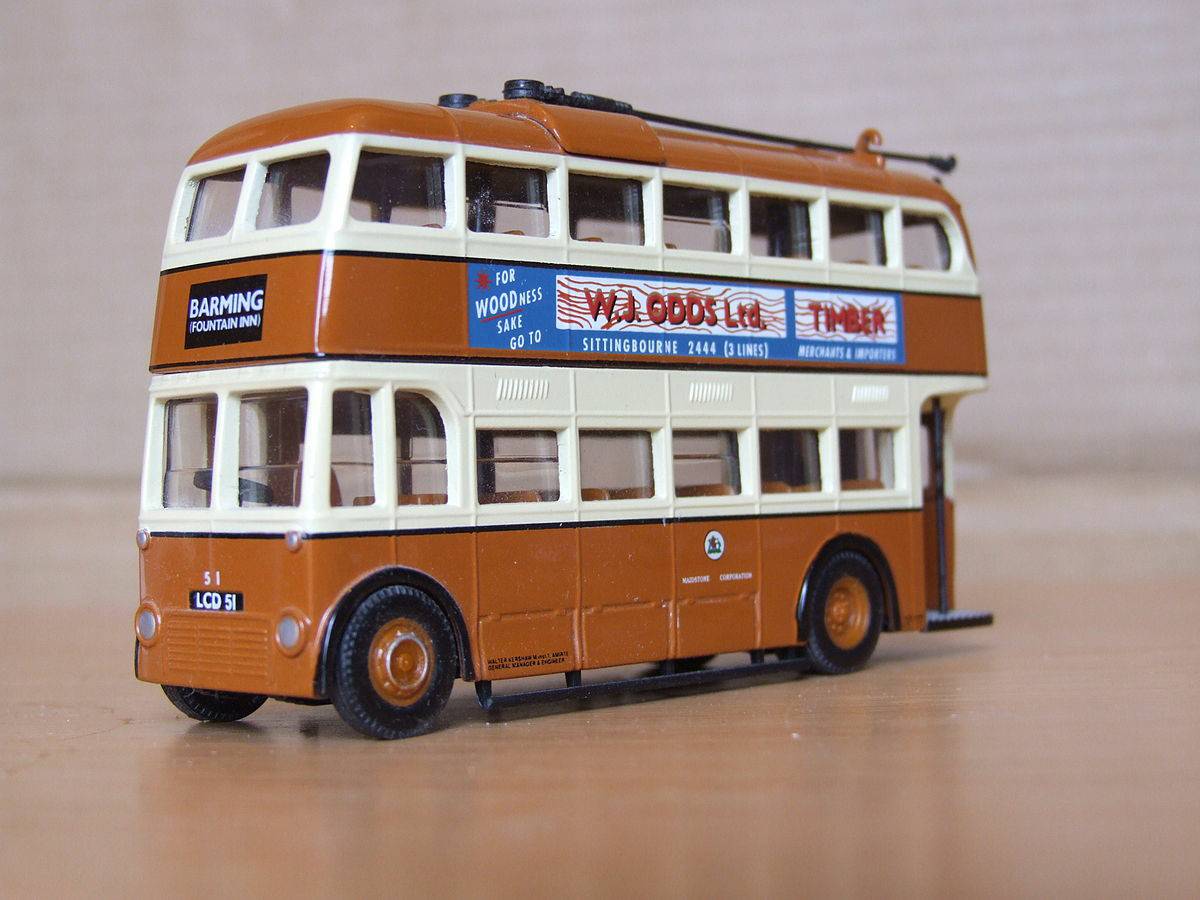

In [768]:
item = list(data_dir.glob('Bus/*'))
PIL.Image.open(str(item[0]))

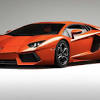

In [769]:
item = list(data_dir.glob('Car/*'))
PIL.Image.open(str(item[0]))

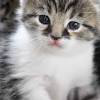

In [770]:
item = list(data_dir.glob('Cat/*'))
PIL.Image.open(str(item[0]))

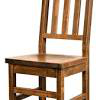

In [771]:
item = list(data_dir.glob('Chair/*'))
PIL.Image.open(str(item[0]))

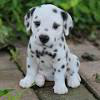

In [772]:
item = list(data_dir.glob('Dog/*'))
PIL.Image.open(str(item[0]))

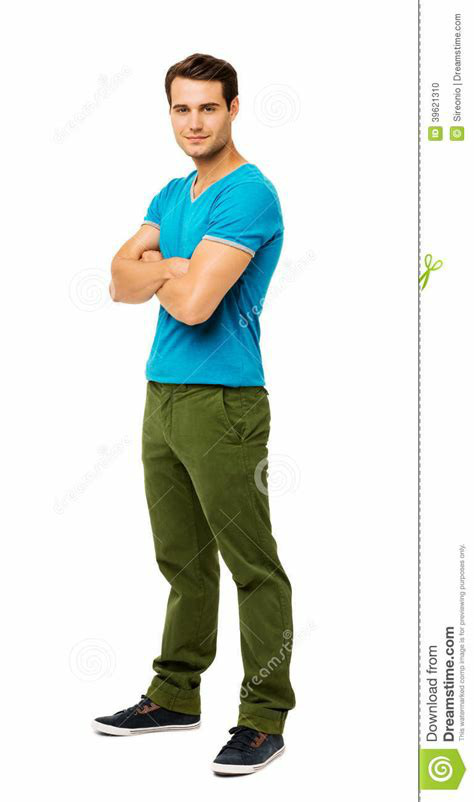

In [773]:
item = list(data_dir.glob('Person/*'))
PIL.Image.open(str(item[6]))

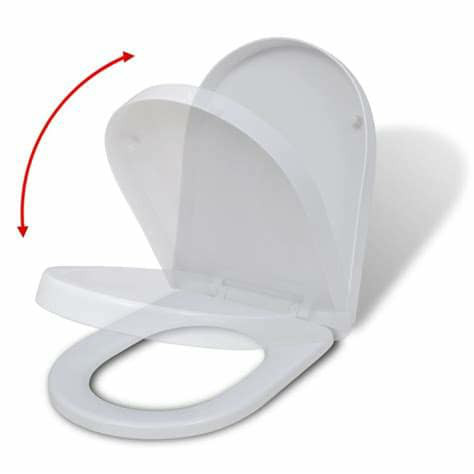

In [774]:
item = list(data_dir.glob('Closet/*'))
PIL.Image.open(str(item[0]))

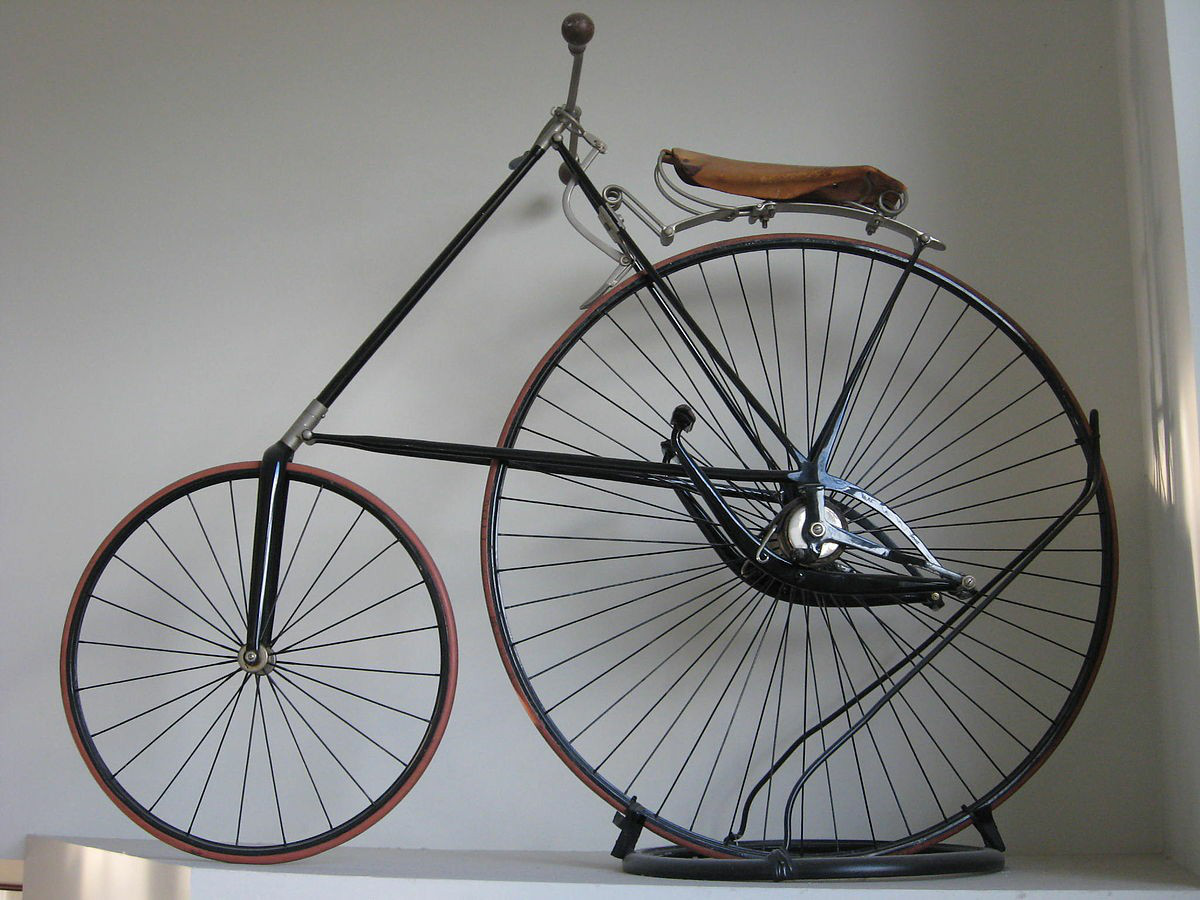

In [775]:
item = list(data_dir.glob('Cycle/*'))
PIL.Image.open(str(item[5]))

## Train test split

Define some parameters for the loader:

In [776]:
batch_size = 32
img_height = 180
img_width = 180

Let's use 80% of the images for training, and 20% for validation.

In [777]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=21,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2172 files belonging to 10 classes.
Using 1738 files for training.


In [778]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=21,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2172 files belonging to 10 classes.
Using 434 files for validation.


In [779]:
#printing the items to be classified
class_names = train_ds.class_names
print(class_names)

['Bike', 'Bus', 'Car', 'Cat', 'Chair', 'Crossing', 'Cycle', 'Dog', 'Person', 'closet']


## Visualize the data


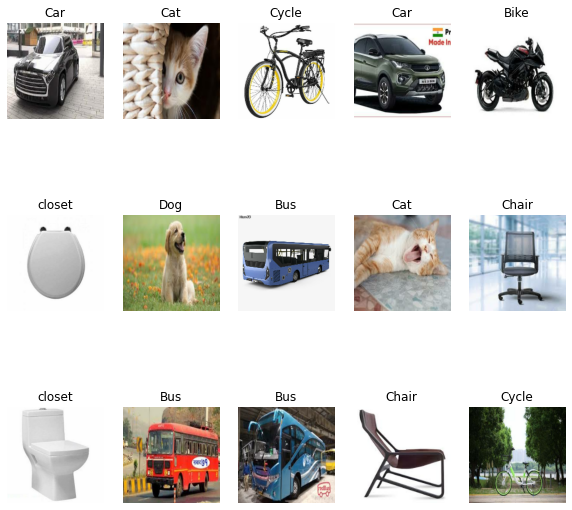

In [780]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Standardize the data

In [781]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [782]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image)) 

0.0 1.0


# Creating the model


In [783]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # standardizing 0 to 255 RGB values to 0 to 1
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [784]:
# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

## Compile the model


In [785]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

View all the layers of the network using the model's `summary` method:

In [786]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_51 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_128 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 45, 45, 64)      

## Train the model

In [787]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
55/55 [==============================] - 5s 82ms/step - loss: 1.9607 - accuracy: 0.2929 - val_loss: 1.3348 - val_accuracy: 0.5599
Epoch 2/20
55/55 [==============================] - 4s 81ms/step - loss: 1.0964 - accuracy: 0.6036 - val_loss: 1.1782 - val_accuracy: 0.6152
Epoch 3/20
55/55 [==============================] - 4s 81ms/step - loss: 0.8056 - accuracy: 0.7186 - val_loss: 1.0874 - val_accuracy: 0.6498
Epoch 4/20
55/55 [==============================] - 4s 79ms/step - loss: 0.5658 - accuracy: 0.8009 - val_loss: 0.9129 - val_accuracy: 0.6889
Epoch 5/20
55/55 [==============================] - 4s 78ms/step - loss: 0.4367 - accuracy: 0.8395 - val_loss: 0.9672 - val_accuracy: 0.7051
Epoch 6/20
55/55 [==============================] - 4s 80ms/step - loss: 0.2844 - accuracy: 0.9085 - val_loss: 1.0153 - val_accuracy: 0.7120
Epoch 7/20
55/55 [==============================] - 4s 80ms/step - loss: 0.1307 - accuracy: 0.9563 - val_loss: 1.1241 - val_accuracy: 0.7304
Epoch 8/20
55

## Visualize training results

Create plots of loss and accuracy on the training and validation sets.

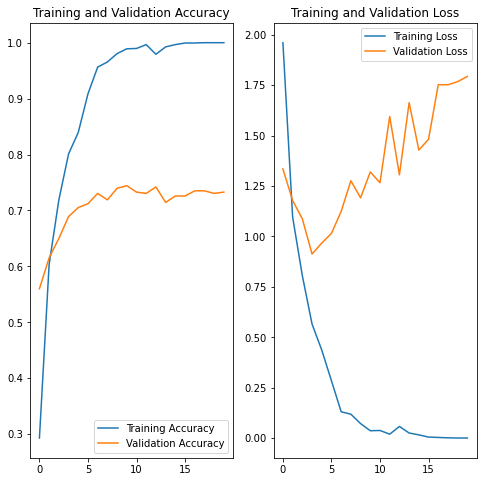

In [788]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only low accuracy on the validation set.

## Overfitting might be happening due to less data points

# data augmentation

data augmentation is done by rotating the images in random angles. It is used to increase train data.

In [789]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

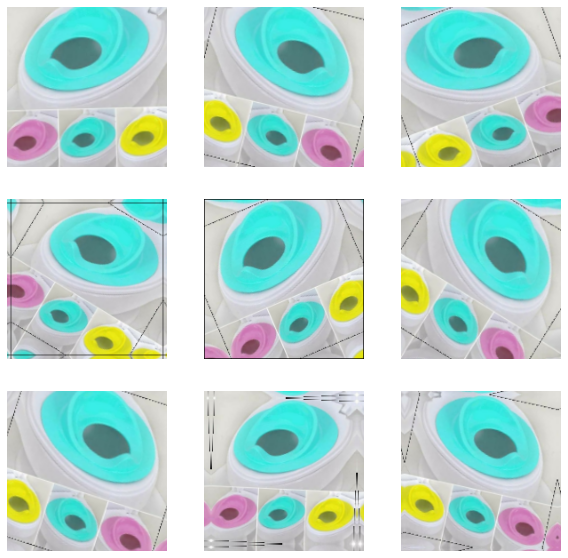

In [790]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [791]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [792]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [793]:
model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_56 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_52 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 45, 45, 64)      

In [794]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
55/55 [==============================] - 5s 85ms/step - loss: 1.9560 - accuracy: 0.2992 - val_loss: 1.5176 - val_accuracy: 0.4447
Epoch 2/15
55/55 [==============================] - 5s 83ms/step - loss: 1.2160 - accuracy: 0.5679 - val_loss: 1.0405 - val_accuracy: 0.6083
Epoch 3/15
55/55 [==============================] - 5s 83ms/step - loss: 1.0155 - accuracy: 0.6369 - val_loss: 1.3134 - val_accuracy: 0.6014
Epoch 4/15
55/55 [==============================] - 5s 83ms/step - loss: 0.8944 - accuracy: 0.6847 - val_loss: 1.2208 - val_accuracy: 0.6060
Epoch 5/15
55/55 [==============================] - 5s 86ms/step - loss: 0.8207 - accuracy: 0.7094 - val_loss: 0.9042 - val_accuracy: 0.6935
Epoch 6/15
55/55 [==============================] - 5s 83ms/step - loss: 0.7270 - accuracy: 0.7445 - val_loss: 0.9051 - val_accuracy: 0.6866
Epoch 7/15
55/55 [==============================] - 5s 83ms/step - loss: 0.6698 - accuracy: 0.7601 - val_loss: 0.8641 - val_accuracy: 0.7281
Epoch 8/15
55

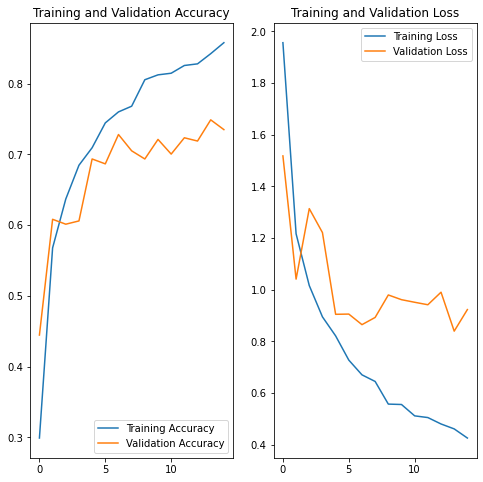

In [795]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

This image most likely belongs to Cat with a 59.97 percent confidence.


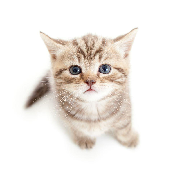

In [796]:
newimage_url = "https://wallpapercave.com/wp/tTGJlz3.jpg"
newimage_path = tf.keras.utils.get_file('cat.jpg', origin=newimage_url)

img = keras.preprocessing.image.load_img(
    newimage_path, target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
img

This image most likely belongs to Bus with a 99.49 percent confidence.


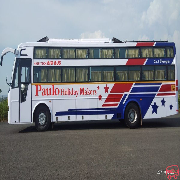

In [797]:
newimage_url = "https://st.redbus.in/bo-images/IND/WM/11231/4/FR/L/mexJmD.jpeg"
newimage_path = tf.keras.utils.get_file('bus.jpg', origin=newimage_url)

img = keras.preprocessing.image.load_img(
    newimage_path, target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
img

This image most likely belongs to Bike with a 98.10 percent confidence.


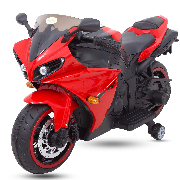

In [798]:
newimage_url = "https://images-na.ssl-images-amazon.com/images/I/71hn7-p46%2BL._SL1500_.jpg"
newimage_path = tf.keras.utils.get_file('bike.jpg', origin=newimage_url)

img = keras.preprocessing.image.load_img(
    newimage_path, target_size=(img_height, img_width)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
img